In [1]:
# Import numerical and plotting libraries
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
# Only show 6 decimals when printing
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

Remember our scores of “psychopathy” from the 12 students:

In [3]:
psychopathy = [11.416,   4.514,  12.204,  14.835,
               8.416,   6.563,  17.343, 13.02,
               15.19 ,  11.902,  22.721,  22.324]

We found out these were students from Berkeley, Stanford and MIT.

Now let's say we have two students from Birmingham and two from Cambridge (that's Birmingham and Cambridge UK, AKA *actual Birmingham* and *actual Cambridge*).

Last time we just had one measurement of the psychopathy score, but this time we have 40 measurements for each student - we did the questionnaire score every week for 40 weeks.  Here's are the Birmingham student scores:

In [4]:
brum_0 = [9.22, 9.19, 9.23, 9.28, 9.19, 9.19, 9.28, 9.24, 9.18, 9.23, 9.18,
          9.18, 9.21, 9.1, 9.11, 9.17, 9.15, 9.22, 9.15, 9.13, 9.27, 9.19,
          9.2, 9.13, 9.17, 9.21, 9.14, 9.22, 9.17, 9.19, 9.17, 9.29, 9.2,
          9.15, 9.24, 9.14, 9.21, 9.1, 9.13, 9.21]
brum_1 = [8.94, 8.91, 8.89, 8.88, 8.83, 8.86, 8.88, 8.95, 8.92, 8.81, 8.92,
          8.88, 8.87, 8.93, 8.95, 8.95, 8.86, 8.88, 8.92, 8.95, 8.88, 8.89,
          8.84, 8.84, 8.94, 8.97, 8.9, 8.95, 8.92, 8.87, 8.92, 8.98, 8.9,
          8.98, 8.77, 8.94, 8.9, 8.89, 8.9, 8.8]

Here are the scores for the two Cambridge students:

In [5]:
cam_0 = [8.99, 9.02, 9.07, 8.97, 8.96, 8.97, 9.05, 9.02, 8.97, 9.03, 9.0,
         9.05, 8.96, 8.98, 8.98, 8.93, 9.01, 9.01, 9.0, 8.99, 8.93, 8.98,
         8.98, 8.96, 8.99, 9.02, 9.09, 9.01, 9.01, 9.0, 8.9, 9.0, 9.0, 9.12,
         8.99, 9.02, 9.0, 8.94, 9.06, 9.04]
cam_1 = [9.29, 9.2, 9.32, 9.18, 9.28, 9.36, 9.2, 9.22, 9.25, 9.22, 9.17, 9.25,
         9.2, 9.27, 9.2, 9.33, 9.21, 9.23, 9.29, 9.19, 9.26, 9.32, 9.17, 9.26,
         9.26, 9.29, 9.19, 9.18, 9.28, 9.26, 9.26, 9.27, 9.22, 9.26, 9.26,
         9.21, 9.34, 9.27, 9.19, 9.28]

We can do a histogram of these scores one under the other, first the Birmingham students, then the Cambridge students.

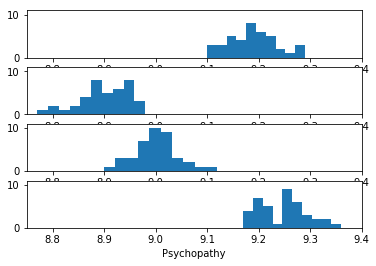

In [6]:
# Make four plots one under the other
fig, axes = plt.subplots(4, 1)
axes[0].hist(brum_0)
axes[1].hist(brum_1)
axes[2].hist(cam_0)
axes[3].hist(cam_1)
axes[3].set_xlabel('Psychopathy')
# Make sure the axes are the same for each plot
for ax in axes:
    ax.axis([8.75, 9.4, 0, 11])

Do you think there is a significant difference in psychopathy between Birmingham students and Cambridge students?

We can use the machinery from the GLM introduction to do a t-test on these values.

First we concatenate the data from all four students into one long vector:

In [7]:
psycho_repeats = np.concatenate([brum_0, brum_1, cam_0, cam_1])
len(psycho_repeats)

160

Next we make a design matrix for our General Linear Model.  We have two dummy variables, and therefore two columns in the design matrix:

In [8]:
# Make an empty design matrix
N = len(psycho_repeats)
X = np.zeros((N, 2))

The first column indicates whether the psychopathy score is from a Birmingham student or not.  There is a 1 corresponding to a value for a Birmingham student, and 0 otherwise:

In [9]:
# First column (0) indicates Birmingham student value
X[:80, 0] = 1

The second column indicates whether the score is from a Cambridge student or not:

In [10]:
# Second column (1) indicates Cambridge student value
X[80:, 1] = 1

Let's have a look at the design matrix:

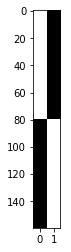

In [11]:
# Show design in grayscale
plt.imshow(X, cmap='gray', aspect=0.1)

You might remember that, when we fit this model in the simplest least-squares way, the parameters are the means for the Birmingham and Cambridge values:

In [12]:
y = psycho_repeats
B = np.linalg.pinv(X).dot(y)
B

array([ 9.044 ,  9.1236])

In [13]:
np.mean(brum_0 + brum_1)

9.0440000000000005

In [14]:
np.mean(cam_0 + cam_1)

9.1236250000000005

Remember the t-test from the GLM page?

In [15]:
# Get t distribution code from scipy library
from scipy.stats import t as t_dist

In [16]:
def t_stat(y, X, c):
    """ betas, t statistic and significance test given data, design matrix, contrast

    This is OLS estimation; we assume the errors to have independent
    and identical normal distributions around zero for each $i$ in
    $\e_i$ (i.i.d).
    """
    # Make sure y, X, c are all arrays
    y = np.asarray(y)
    X = np.asarray(X)
    c = np.atleast_2d(c).T  # As column vector
    # Calculate the parameters - b hat
    beta = npl.pinv(X).dot(y)
    # The fitted values - y hat
    fitted = X.dot(beta)
    # Residual error
    errors = y - fitted
    # Residual sum of squares
    RSS = (errors**2).sum(axis=0)
    # Degrees of freedom is the number of observations n minus the number
    # of independent regressors we have used.  If all the regressor
    # columns in X are independent then the (matrix rank of X) == p
    # (where p the number of columns in X). If there is one column that
    # can be expressed as a linear sum of the other columns then
    # (matrix rank of X) will be p - 1 - and so on.
    df = X.shape[0] - npl.matrix_rank(X)
    # Mean residual sum of squares
    MRSS = RSS / df
    # calculate bottom half of t statistic
    SE = np.sqrt(MRSS * c.T.dot(npl.pinv(X.T.dot(X)).dot(c)))
    t = c.T.dot(beta) / SE
    # Get p value for t value using cumulative density dunction
    # (CDF) of t distribution
    ltp = t_dist.cdf(t, df) # lower tail p
    p = 1 - ltp # upper tail p
    return beta, t, df, p

Here is a t-test, testing the null hypothesis that the mean of the Birmingham psychopathy values is the same as mean of the Cambridge psychopathy values:

In [17]:
betas, t_value, df, p_value = t_stat(y, X, [-1, 1])
betas

array([ 9.044 ,  9.1236])

In [18]:
p_value

array([[ 0.0003]])

It's highly significant.  Do you find that surprising?